<a href="https://colab.research.google.com/github/lail-lei/AML/blob/main/project4/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Pandas and Create DataFrames**

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

# Import matplotlib 
import matplotlib.pyplot as plt 
# Import seaborn for graphing 
import seaborn as sbn

# Read raw file from github into dataframes 
df_train = pd.read_csv('https://raw.githubusercontent.com/lail-lei/AML/main/project4/Train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/lail-lei/AML/main/project4/Test.csv')

In [2]:
# entire dataset for preliminary analysis 
df_complete_set = df_train.append(df_test, ignore_index='true');

# **Preliminary Analysis**

## **Preprocess Data**




### **Imputing and Ordinal Encoding**

Before cross tabulation, the target class and other categorical attributes must be encoded. I used ordinal encoding to keep things simple.

In [3]:
# import imputer and encoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# prelimin processing
def ordinal_encode_impute (column):
  
  # first, replace missing values with most frequently occuring
  # create imputer
  imputer = SimpleImputer(strategy='most_frequent')
  # Train the imputer
  imputer.fit(column)
  # Transform column
  X = imputer.transform(column)
  
  # then encode categorical values
  enc = OrdinalEncoder()
  enc.fit(X)
  return enc.transform(X)

I will run the preliminary analysis on the entire dataset.


In [4]:

df_complete_set_processed = df_complete_set.copy(deep=True)

# for categorical values, need to preprocess before preliminary analysis 
cat_cols = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Segmentation"];

# for each categorical col, ordinal encode and impute 
for col in cat_cols:
  df_complete_set_processed[col] = ordinal_encode_impute(pd.DataFrame(df_complete_set[col]))


### **Grouping Continuous Data**

Before we can run cross tabulation, let's group the continous data so that it can be more easily visualied in graphs. 

In [5]:
# let's group continous column values into ranges so can be visualized better 
groupedX = df_complete_set.copy(deep=True)

# break each column down by quartile
def create_conditions (column):
    return [ groupedX[column] <= groupedX[column].quantile(.25), 
             groupedX[column] <= groupedX[column].quantile(.5), 
             groupedX[column] <= groupedX[column].quantile(.75),
             groupedX[column] <= groupedX[column].quantile(1.0)
            ]

# labels to correspond with quartiles
choices = [0, 1, 2, 3]

# create conditions and replace values with new labels

# for age
age_conditions = create_conditions("Age")
groupedX["Age"] = pd.DataFrame(np.select(age_conditions, choices, default=0))

# for family_size
fam_conditions = create_conditions("Family_Size")
groupedX["Family_Size"] = pd.DataFrame(np.select(fam_conditions, choices, default=0))

# for work experience
work_conditions = create_conditions("Work_Experience")
groupedX["Work_Experience"] = pd.DataFrame(np.select(work_conditions, choices, default=0))



In [6]:
groupedX.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,0,No,Healthcare,1,Low,2,Cat_4,D
1,462643,Female,Yes,1,Yes,Engineer,0,Average,1,Cat_4,A
2,466315,Female,Yes,3,Yes,Engineer,1,Low,0,Cat_6,B
3,461735,Male,Yes,3,Yes,Lawyer,0,High,0,Cat_6,B
4,462669,Female,Yes,1,Yes,Entertainment,0,High,3,Cat_6,A
5,461319,Male,Yes,3,No,Artist,0,Average,0,Cat_6,C
6,460156,Male,No,1,Yes,Healthcare,1,Low,1,Cat_6,C
7,464347,Female,No,1,Yes,Healthcare,1,Low,1,Cat_6,D
8,465015,Female,Yes,3,Yes,Engineer,0,Low,1,Cat_7,D
9,465176,Female,Yes,3,Yes,Artist,1,Average,2,Cat_6,C


In [7]:
df_complete_set.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


For work experience:

A score of 0 means 0 years of work experience, a score of 1 means 0 - 1 years of work experience, a score of 2 means 1 - 4 years of work experience, and a score of 3 means 4-14 years of work experience.

For Age:

A score of 0 means age 18 - 30, a score of 1 means age 30 - 41, a score of 2 means an age of 41 - 53 years of work experience, and a score of 3 means age 53-89. 


For family size:

A score of 0 means a size of 1 - 2, a score of 2 means size of 2 - 3, a score of 3 means a size of 3 -4 and and a score of 4 means a size of 4 - 9.


## **Distributions**

In [8]:
# how many values per class
df_complete_set["Segmentation"].value_counts()

D    3027
A    2818
C    2442
B    2408
Name: Segmentation, dtype: int64

In [9]:
# how many values per class
df_train["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

## **Feature Correlations**

###**Correlation heatmap**

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

np.random.seed(42)

# x and y 
# data and target classes
heat_X = df_complete_set_processed.copy(deep=True)
heat_y = df_complete_set_processed["Segmentation"]

# drop target and non-essential columns
heat_X.drop(['ID', 'Var_1', 'Segmentation'], axis=1, inplace=True)

# use the 80-20 rule for validation
X_train, X_test, y_train, y_test = train_test_split(heat_X, heat_y, stratify=heat_y, test_size=0.2)

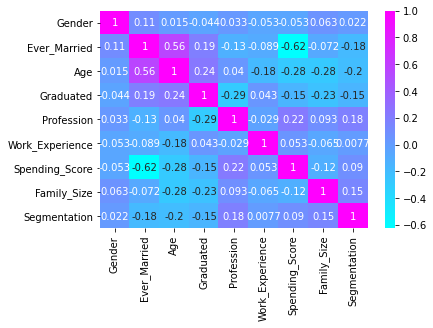

In [11]:

# produce a heatmap of feature correlations

import pandas as pd
import seaborn as sns

X_comb = pd.concat([X_train, y_train.astype(float)], axis=1)
g = sns.heatmap(X_comb[["Gender", "Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Spending_Score", "Family_Size", "Segmentation"]].corr(),
                annot=True, 
                cmap = "cool")


The feature with the strongest correlation to the target class (segmenting into class A, B, C, or D) is the customer age. This is an inverse relationship, so the lower the age, the more likely to be classified as a particular class. 

The next highest feature correlations to the target class is customers martial status and their profession (both are equally strong at -0.18 and 0.18). 

The third highest feature correlations to the target class were whether the customer had graduated and their family size (both are equally strong at -0.15 and 0.15). 

###**Cross tabulation**

In [12]:
# drop target and non-essential columns
groupedX.drop(['ID', 'Var_1', 'Segmentation'], axis=1, inplace=True)

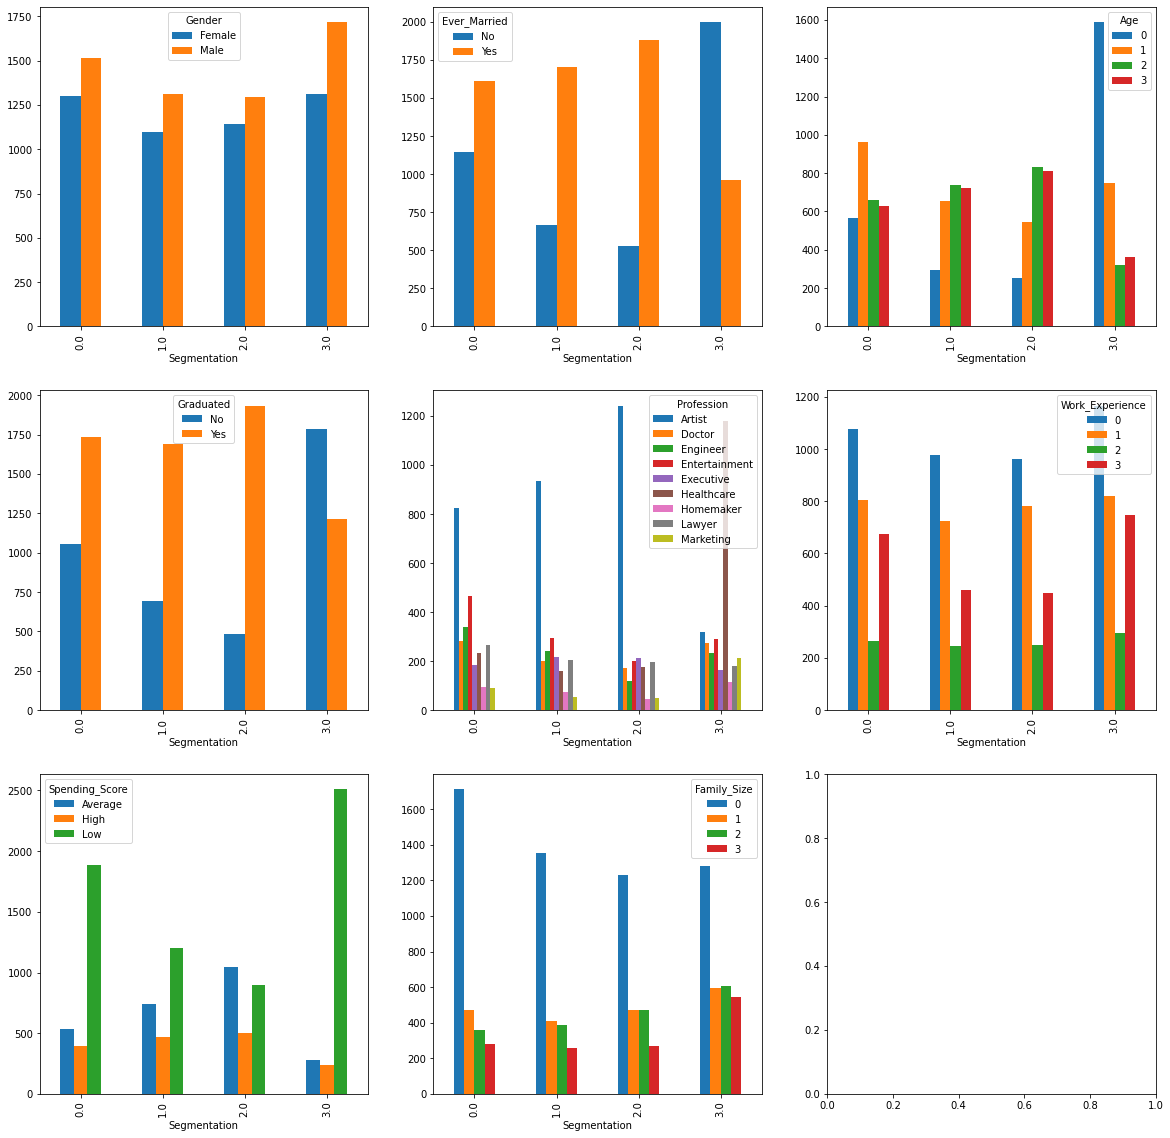

In [13]:

figure, axes = plt.subplots(3, 3, figsize=(20, 20))

# function to help display subplots 

classIndex = 0;

for row in range(3):
  for col in range(3):
    if classIndex == 8: 
      break
    ct1 = pd.crosstab(heat_y[:], groupedX[groupedX.columns[classIndex]])
    ct1.plot.bar(ax = axes[row][col])
    classIndex += 1
    

plt.show()


##**Summary**

**Age and Segmentation**

The cross tabulated graph for age and segmentation reflects the relatively strong correlation between these features. 

Target class 3 skews young. Customers age 18-30 clearly outnumber every other age group in this class. There are twice as many customers age 18-30 in this group than the next most common age group of age 30-40. There are over 4 times as many 18-30 aged customers than any age over 40 (41-53 and 54-89). The customers age (or specifically, youth) has a very strong correlation to whether they are segmented to class 3. 

Age seems to be a less significant factor for classes 0, 1 and 2. In general, there is a most significant age group per class. The next most significant age group for that class is consistently an age group close to the most significant age group. E.g., for class 3, the most significant age group is 18-30, and the next most significant is 30-40. For class 0, the most significant is 30-40 and the second most is 40-53. 

In general, when a class has a lot of young customers (18-30), it has few of the oldest customers (54-89). When a class has a lot of older customers (54-89) it has few of the youngest customers (18-30). This suggests that age has a relatively strong correlation to segmentation accross all target classes. 

 
**Marital Status and Segmentation**

Marital status has a similar distribution as age. Target class 3 has twice as many "never-married" customers as married/divorced/widowed customers. This makes sense as people between 18 and 30 are not as likely to be married as people over the age of 30. Target classes with a higher proportion of older customers also have a higher proportion of married customers. 

In general, when a class has a lot of married/divorced/widowed customers, it has fewer never-married customers (54-89). When a class has a lot of never-married customers, it has fewer married/divorced/widowed customers. Based on the heatmap, it appears that age and marital status have a very strong correlation (0.56). Since the segmentation is correlation with age, it will also be correlated with martial status. 

**Profession and Segmentation**

Certain professions appear frequently in some classes and less frequently in others. Profession 0 is represented significantly more in classes 0, 2, 1 (higher aged classes) and less in class 3 (younger class). In these classes, profession 0 is the most significant profession. Profession 0 ranges from occuring twice to around ten times as often as the next most significant class. In general, as age increase, the prevelance of profession 0 increases.  

Profession 0 is underrepresented in classs 3. Profession 5 is over represented in the youngest class (3) and underepresented in the older classes. 

There appears to be a clear correlation between these two professions and target class.

**Education and Segmentation**

In general, education (whether the customer has graduated) has a relatively strong correlataion with age (0.24). Since the segmentation is correlation with age, it makes sense that it would also be correlated with education. And in general, older classes have a higher proportion of graduates. The youngest class is the only one where non graduates outnumber graduates.


**Family size and Segmentation**

In general, family size has a relatively strong correlataion with age (-0.28). Since the segmentation is correlation with age, it makes sense that it would also be correlated with family size. 

In general, the classes that contain a higher proportion of older customers have smaller family sizes. The class with the smallest families (fewest customers with family size >2) is 30-40.

Younger customers may still live with parents/siblings, etc and therefore may be more likely to have larger family sizes.


# **Pipelines**

###**First, separate x and y values for the entire dataset**


In [15]:
# create the data to run through pipelines

from sklearn.preprocessing import OrdinalEncoder

# copy unprocessed data 
X_train = df_complete_set.copy(deep=True)
# drop target and non-essential columns
X_train.drop(['ID', 'Var_1', 'Segmentation'], axis=1, inplace=True)

# target class (needs to be encoded)
enc = OrdinalEncoder()
df_target = pd.DataFrame(df_complete_set["Segmentation"]);

enc.fit(df_target)
df_target["y"]= enc.transform(df_target)
y_train = df_target["y"]


###**Sanity Check- print the X and Y values before submitting to pipeline for imputing/ further encoding**


In [16]:
df_complete_set.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [17]:
df_complete_set.shape

(10695, 11)

In [18]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [19]:
X_train.shape

(10695, 8)

In [20]:
y_train.head()

0    3.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: y, dtype: float64

In [21]:
y_train.shape

(10695,)

###**Create the pipelines!**


In [22]:
# Columntransformer for preprocessing 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler


########## First create a columntransformer 

cat_cols = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"]

cat_transformer = Pipeline(steps=[
    # strategies are mean, median, most_frequent, etc.
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # In ordinal encoding, each unique category value is assigned an integer value.
    ('ordinal', OrdinalEncoder())
])


########## Second create a pipeline for the numeric attributes
num_cols = ['Age', 'Family_Size', 'Work_Experience']

num_transformer = Pipeline(steps=[
    # Number of neighboring samples to use for K-nearest neighor imputation
    ('imputer', KNNImputer(n_neighbors=5)),

    # StandardScaler makes mean = 0 and scales the data to unit variance 
    ('scaler', StandardScaler())
])


########## Finally, apply column transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [23]:

# Create SVC classifiers

from sklearn.svm import SVC


########## A poly kernel classifier
linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear'))])

linear_svc_clf_score = cross_val_score(linear_svc_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

########## A poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly'))])
poly_svc_clf_score = cross_val_score(poly_svc_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

########## An RBF kernel classifier
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf'))])


rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

print(linear_svc_clf_score)
print(poly_svc_clf_score)
print(rbf_svc_clf_score)


0.44871435250116876
0.4518934081346424
0.46778868630201026


These scores are surprisingly low!

In [24]:
from sklearn.ensemble import RandomForestClassifier

########## A random forest
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

rf_clf_score = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

print(rf_clf_score)


0.4095371669004208


This score is even lower!

In [25]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


########## A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])
entropy_dt_score = cross_val_score(entropy_dt_clf, X_train, y_train, cv=3, scoring="accuracy").mean()

########## A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_score = cross_val_score(gini_dt_clf, X_train, y_train, cv=3, scoring="accuracy").mean()


### Extra trees!
extra_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ExtraTreesClassifier())])
extra_tree_score = cross_val_score(extra_tree, X_train, y_train, cv=3, scoring="accuracy").mean()

print(entropy_dt_score)
print(gini_dt_score)
print(extra_tree_score)


0.3672744273024778
0.37138849929873774
0.39784946236559143


These scores are even lower!

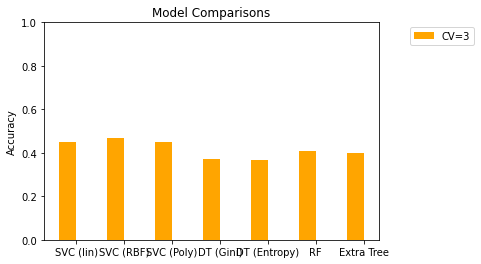

In [26]:

# Summarize the findings for all models

labels = ['SVC (lin)', 'SVC (RBF)', 'SVC (Poly)', 'DT (Gini)', 'DT (Entropy)', 'RF', 'Extra Tree']
training_scores = [linear_svc_clf_score, rbf_svc_clf_score, poly_svc_clf_score, gini_dt_score, entropy_dt_score, rf_clf_score, extra_tree_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=3', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

### **Let's see how these models perform binary classification on the dataset instead**

In [27]:
# convert 2 to 0 and 3 to 1

y_binarized = y_train.copy(deep=True)

for i in range (0, y_binarized.size):
  if y_binarized[i] == 2:
    y_binarized[i] = 0
    continue
  if y_binarized[i] == 3:
    y_binarized[i] = 1

In [28]:
# Create SVC classifiers using y_binarized 

bin_linear_svc_clf_score = cross_val_score(linear_svc_clf, X_train, y_binarized, cv=3, scoring="accuracy").mean()
bin_poly_svc_clf_score = cross_val_score(poly_svc_clf, X_train, y_binarized, cv=3, scoring="accuracy").mean()
bin_rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X_train, y_binarized, cv=3, scoring="accuracy").mean()

print("SVC (linear): ", bin_linear_svc_clf_score)
print("SVC (poly): ", bin_poly_svc_clf_score)
print("SVC (rbf): ", bin_rbf_svc_clf_score)


SVC (linear):  0.5957924263674614
SVC (poly):  0.5998129967274427
SVC (rbf):  0.6077606358111267


In [29]:
# Create RF and decision classifiers using y_binarized 

bin_rf_clf_score = cross_val_score(rf_clf, X_train, y_binarized, cv=3, scoring="accuracy").mean()
bin_entropy_dt_score = cross_val_score(entropy_dt_clf, X_train, y_binarized, cv=3, scoring="accuracy").mean()
bin_gini_dt_score = cross_val_score(gini_dt_clf, X_train, y_binarized, cv=3, scoring="accuracy").mean()
bin_extra_tree_score = cross_val_score(extra_tree, X_train, y_binarized, cv=3, scoring="accuracy").mean()


print("Rf: ", bin_rf_clf_score)
print("DT (entropy): ", bin_entropy_dt_score)
print("DT (gini): ", bin_gini_dt_score)
print("Extra Trees: ", bin_extra_tree_score)


Rf:  0.5757830762038335
DT (entropy):  0.5558672276764843
DT (gini):  0.5525011687704534
Extra Trees:  0.5737260402057035


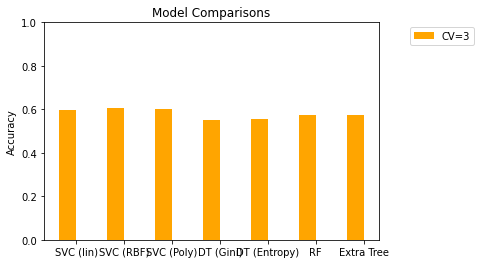

In [30]:

# Summarize the findings for all binary models

labels = ['SVC (lin)', 'SVC (RBF)', 'SVC (Poly)', 'DT (Gini)', 'DT (Entropy)', 'RF', 'Extra Tree']
training_scores = [bin_linear_svc_clf_score, bin_rbf_svc_clf_score, bin_poly_svc_clf_score, bin_gini_dt_score, bin_entropy_dt_score, bin_rf_clf_score, bin_extra_tree_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=3', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

### **Transparent Models**

Let's look at what the Decision tree learned and see what columns are most important

|--- Profession <= -0.57
|   |--- Profession <= -1.16
|   |   |--- Graduated <= 4.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- Graduated >  4.50
|   |   |   |--- truncated branch of depth 16
|   |--- Profession >  -1.16
|   |   |--- Graduated <= 3.50
|   |   |   |--- truncated branch of depth 21
|   |   |--- Graduated >  3.50
|   |   |   |--- truncated branch of depth 23
|--- Profession >  -0.57
|   |--- Spending_Score <= 1.50
|   |   |--- Ever_Married <= 0.50
|   |   |   |--- truncated branch of depth 24
|   |   |--- Ever_Married >  0.50
|   |   |   |--- truncated branch of depth 26
|   |--- Spending_Score >  1.50
|   |   |--- Graduated <= 0.50
|   |   |   |--- truncated branch of depth 23
|   |   |--- Graduated >  0.50
|   |   |   |--- truncated branch of depth 24



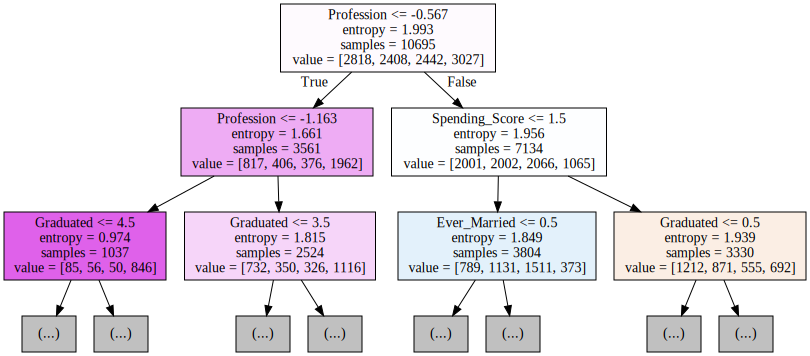

In [31]:
# Convert the decision tree model to text and graph

from matplotlib import pyplot
from sklearn.tree import export_text, export_graphviz
import graphviz

# the DT model is refit to the entire dataset
tree_X = df_complete_set.copy(deep=True)
tree_y = df_complete_set["Segmentation"]

# drop target and non-essential columns
tree_X.drop(['ID', 'Var_1', 'Segmentation'], axis=1, inplace=True)


# we need to refit the DT model that is part of a composite pipe before exporting it as text
entropy_dt_clf['classifier'].fit(preprocessor.fit_transform(tree_X), tree_y)


# display the induced decision tree as a series of logical rules
text_representation = export_text(entropy_dt_clf['classifier'],
                                  feature_names=["Profession", 'Age', 'Family_Size', 'Work_Experience', "Gender",  "Ever_Married", "Graduated", "Spending_Score" ],
                                  max_depth=2)
print(text_representation)


# draw the induced decision tree
dot_data = export_graphviz(entropy_dt_clf['classifier'],
                                  max_depth=2,
                                  feature_names=["Profession",'Age', 'Family_Size', 'Work_Experience', "Gender", "Ever_Married", "Graduated",  "Spending_Score" ],
                                  filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

Feature: 0, Score: 0.39983
Feature: 1, Score: 0.13929
Feature: 2, Score: 0.21469
Feature: 3, Score: 0.04727
Feature: 4, Score: 0.02424
Feature: 5, Score: 0.03621
Feature: 6, Score: 0.09262
Feature: 7, Score: 0.04585


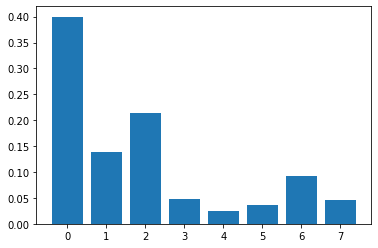

In [32]:
# get feature importances from the model
importance = entropy_dt_clf['classifier'].feature_importances_

# summarize feature importances
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importances
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

According to the decision tree, it looks like spending score and profession are the 2 top columns, followed by graduation status. I'm not sure if the representation of the tree actually describes the feature importance. 

Running feature importance inside of the pipeline shows that feature 0 is significantly more important than any other feature (it's double as important as the next most important feature). But I am unable to say for certain which feature feature 0 is. 


### **Feature importance**


In [33]:
# Import Imputer to replace null values with median values for that column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Train the imputer
imputer.fit(tree_X)

# Transform df_nums
processed_tree_X = imputer.transform(tree_X)

# Create dataframe from transformed array
processed_tree_X  = pd.DataFrame(processed_tree_X, columns=tree_X.columns, index=tree_X.index);


In [34]:
#import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# train the model
enc = OrdinalEncoder()
enc.fit(processed_tree_X);

# encode x
processed_tree_X = pd.DataFrame(enc.transform(processed_tree_X), columns=processed_tree_X.columns)

Feature: Gender
 Score: 0.05481

Feature: Ever_Married
 Score: 0.02534

Feature: Age
 Score: 0.40909

Feature: Graduated
 Score: 0.03572

Feature: Profession
 Score: 0.09311

Feature: Work_Experience
 Score: 0.20120

Feature: Spending_Score
 Score: 0.04604

Feature: Family_Size
 Score: 0.13468



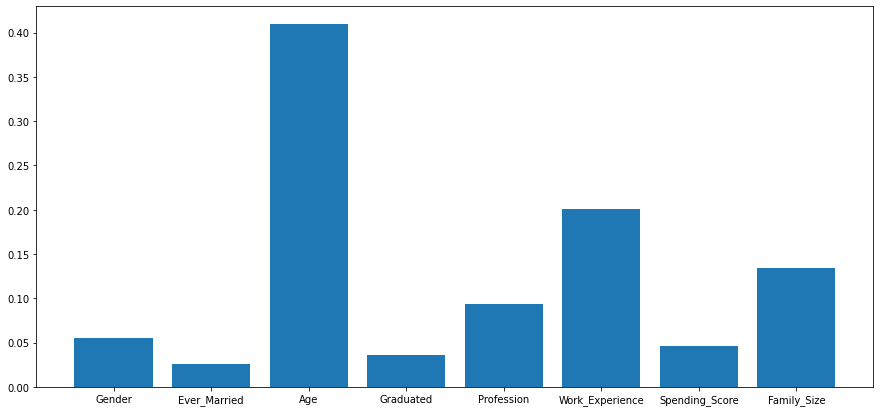

In [35]:
########## A decicion tree with entropy
no_pipeline_dt = DecisionTreeClassifier(criterion='entropy');
no_pipeline_dt = no_pipeline_dt.fit(processed_tree_X, tree_y)

# get feature importances from the model
importance = no_pipeline_dt.feature_importances_

# summarize feature importances
for i,v in enumerate(importance):
  label = processed_tree_X.columns[i]
  print('Feature: %s\n Score: %.5f\n' % (label, v))
 
pyplot.figure(figsize=[15, 7])
# plot feature importances
pyplot.bar(processed_tree_X.columns, importance)


pyplot.show()


The appearance of this graph is pretty similiar to the verison from the pipeline (it looks like the columns have been reordered, but there are the same number of columns with the same values).

I'm assuming that without the use of a column transformer (no pipeline), the features are not reordered. Therefore, the features returned by feature_importance correspond with the columns in the order in which they appear in the data frame. If so, it would make sense that age is the most significant feature, based on our cross tabulation charts above. 


### **Let's drop less relevant columns from the dataset**

Let's set the "relevancy" threshold at ~5%. This eliminates Ever_Married and Graduated. 

In [36]:
X_reduced = X_train.copy(deep=True)
X_reduced.drop(["Ever_Married", 'Graduated', 'Spending_Score'], axis=1, inplace=True)



In [37]:
# Columntransformer for preprocessing (reduced)

########## First create a columntransformer 

cat_cols_reduced = ['Profession', 'Gender']

cat_transformer_reduced = Pipeline(steps=[
    # strategies are mean, median, most_frequent, etc.
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # In ordinal encoding, each unique category value is assigned an integer value.
    ('ordinal', OrdinalEncoder())
])

########## Second create a pipeline for the numeric attributes
num_cols_reduced = ['Age', 'Family_Size', 'Work_Experience']

num_transformer_reduced = Pipeline(steps=[
    # Number of neighboring samples to use for K-nearest neighor imputation
    ('imputer', KNNImputer(n_neighbors=5)),

    # StandardScaler makes mean = 0 and scales the data to unit variance 
    ('scaler', StandardScaler())
])


########## Finally, apply column transformations
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', num_transformer_reduced, num_cols_reduced),
        ('cat', cat_transformer_reduced, cat_cols_reduced)
    ])

In [38]:
# Create SVC classifiers using reduced dataset

########## A poly kernel classifier
reduced_linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', SVC(kernel='linear'))])
########## A poly kernel classifier
reduced_poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', SVC(kernel='poly'))])

########## An RBF kernel classifier
reduced_rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', SVC(kernel='rbf'))])

########## A random forest
reduced_rf_clf = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', RandomForestClassifier())])

########## A decicion tree with entropy
reduced_entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])


########## A decicion tree with gini
reduced_gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])




### Extra trees!
reduced_extra_tree = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                      ('classifier', ExtraTreesClassifier())])



reduced_linear_svc_clf_score = cross_val_score(reduced_linear_svc_clf, X_reduced, y_train, cv=3, scoring="accuracy").mean()
reduced_poly_svc_clf_score = cross_val_score(reduced_poly_svc_clf, X_reduced, y_train, cv=3, scoring="accuracy").mean()
reduced_rbf_svc_clf_score = cross_val_score(reduced_rbf_svc_clf, X_reduced, y_train, cv=3, scoring="accuracy").mean()
reduced_rf_clf_score = cross_val_score(reduced_rf_clf, X_reduced, y_train, cv=3, scoring="accuracy").mean()
reduced_entropy_dt_score = cross_val_score(reduced_entropy_dt_clf, X_reduced, y_train, cv=3, scoring="accuracy").mean()
reduced_gini_dt_score = cross_val_score(reduced_gini_dt_clf, X_reduced, y_train, cv=3, scoring="accuracy").mean()
reduced_extra_tree_score = cross_val_score(reduced_extra_tree, X_reduced, y_train, cv=3, scoring="accuracy").mean()

print("SVC (linear): ", reduced_linear_svc_clf_score)
print("SVC (poly): ", reduced_poly_svc_clf_score)
print("SVC (rbf): ", reduced_rbf_svc_clf_score)

print("RF: ", reduced_rf_clf_score)
print("DT (entropy): ", reduced_entropy_dt_score)
print("DT (gini): ", reduced_gini_dt_score)
print("Extra tree: ", reduced_extra_tree_score)

SVC (linear):  0.41271622253389434
SVC (poly):  0.39869097709209916
SVC (rbf):  0.4441327723235156
RF:  0.38924731182795697
DT (entropy):  0.3602618045815802
DT (gini):  0.35820476858345024
Extra tree:  0.3808321645628799


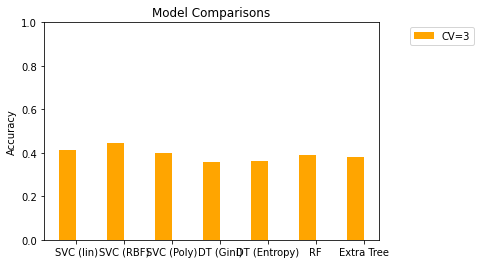

In [39]:

# Summarize the findings for all models

labels = ['SVC (lin)', 'SVC (RBF)', 'SVC (Poly)', 'DT (Gini)', 'DT (Entropy)', 'RF', 'Extra Tree']
training_scores = [reduced_linear_svc_clf_score, reduced_rbf_svc_clf_score, reduced_poly_svc_clf_score, reduced_gini_dt_score, reduced_entropy_dt_score, reduced_rf_clf_score, reduced_extra_tree_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=3', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

Reducing the features reduced the performance of all models by 2-6%. The strongest peformer is still SVC (rbf). SVCs of all types outperformed all tree based models (RF, DTs of all types, Extra Tree) by 3-8%.



### **Hyperparemeter Optimization**

Find optimum values of hyperparameters using GridSearchCV:

In [40]:
# Use GridSearchCV to find optimum hyperparameter values for the DT model

# create a dictionary of all values we want to test
param_grid1 = { 'criterion':['gini','entropy'],    # impurity criterion
              'max_depth': np.arange(3, 15)}      # tree depth 
   
    
# use gridsearch to test all values
grid_search1 = GridSearchCV(entropy_dt_clf['classifier'], 
                           param_grid1, 
                           cv=3)
    
# fit the model 
grid_search1.fit(preprocessor.fit_transform(X_train), y_train)

   
print("For DT, the best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search1.best_score_))

print("The best DT model hyperparameters:", grid_search1.best_params_)

For DT, the best achieved accuracy after hyperparameter optimization: 0.47 

The best DT model hyperparameters: {'criterion': 'gini', 'max_depth': 5}


In [41]:
# Use GridSearchCV to find optimum hyperparameter values for the DT model

# create a dictionary of all values we want to test
param_grid2 = { 'kernel':['rbf','linear', 'poly'],    # kernel
                'decision_function_shape': ['ovo', 'ovr'], # decision function (choose between ovo, one verus one, and ovr, one versus rest)
                 'C' : np.arange(1, 3),
                 'degree': np.arange(1,3)
               } 
   
    
# use gridsearch to test all values
grid_search2 = GridSearchCV(rbf_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# fit the model 
grid_search2.fit(preprocessor.fit_transform(X_train), y_train)

   
print("For SVC, the best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search2.best_score_))

print("The best SVC model hyperparameters:", grid_search2.best_params_)

For SVC, the best achieved accuracy after hyperparameter optimization: 0.47 

The best SVC model hyperparameters: {'C': 2, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf'}


The best DT model hyperparameters are gini for criterion, and 5 for max_depth.

The best SVC model hyperparameters are rbf for kernel, 2 for C, 1 for degree, and ovo for decision_function_shape.


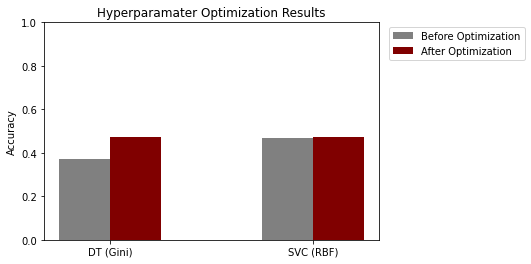

In [42]:

# graph results of grid search for the two models

labels = ['DT (Gini)', 'SVC (RBF)']
before_optimization_scores = [gini_dt_score, rbf_svc_clf_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

x = np.arange(len(labels))  # the label locations
width = 0.25                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_optimization_scores, width, label='Before Optimization', color='gray')
rects2 = ax.bar(x + width/2, after_optimization_scores, width, label='After Optimization', color='maroon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Hyperparamater Optimization Results')
plt.show()

# **Summary**


**Overall Performance**

None of the models (decision trees, SVCs, random forest, or extra tree classifer) did a particularly good job classifing this data set.

The model with the highest performance was SVC (rbf kernel) with an accuracy of 46.7% and an optimized accuracy of 47%. The rbf kernel only slightly outperformed the other SVCs (by 1-2%).

All SVCs (linear, poly, rbf) outperformed all tree based classifiers (decision trees (gini and entropy), random forest, and extra tree classifier, by 7-11%. 


**SVC Performance**


Through hyperparameter optimization (GridSearch) it's clear that the highest possible accuracy for a SVC is 47%. The best performing SVC (either optimized or not optimized) uses an RBF kernel.

The next highest perfoming SVC is the poly kernel (45%). The linear kernel had a slightly lower accuracy than the poly kernel (44%). 

In general, the SVCs performances were comparable (within 3% of each other). 


**Tree based classifier Performance**


Through hyperparameter optimization (GridSearch) it's clear that the highest possible accuracy for a DT is 47%. 

The best performing DT (either optimized or not optimized) uses the gini coefficent. With optimized hyperparameters, the gini decision tree's performance improves 10% (from 37% to 47%). 

Random forest outperformed all non-optimized decision trees (40%) and the non-optimized extra tree classifier. 

In general, the tree-based classifier's performances were comparable (within 4% of each other). 


**Feature importance and reduced dimensonality**


Running feature_importance on the decision tree for the entire dataset showed that the most significant features were age, family size and work experience. The significance of customer age is backed up by our feature correlation in preliminary analysis. 

I ran the models on a dataset containing only the attributes with a significance score above 5%. All models performed slightly worse on the reduced dataset (-2-6%), which suggests that all features influence segmentation.


**Binary classification vs multiclass classification**

All models performed better when the number of target classes was reduced from 4 to 2. However, the models didn't perform particularly well as binary classifiers for this dataset either. The highest performing model was again SVC (rbf), with an accuracy rate of only 60%. This low accuracy suggests that this dataset is difficult for models to classify.
